# Opioid Crisis - Analysis

I want to take a second look at the data from the Opioid Crisis datasheet.

- (link here: https://www.mathmodels.org/Problems/2019/MCM-C/index.html)

Motivation: was part of the MCM 2019.

Data we will work with:
* Drug identification counts in years 2010-2016
* Socio-economic factors collected for five states (Ohio, Kentucky, West Virginia, Virginia, Pennsylvania)

In [1]:
import numpy as np
import pandas as pd

# drug use data.
df_nflis = pd.read_excel('2018_MCMProblemC_DATA/MCM_NFLIS_Data.xlsx', sheet_name="Data")

# socio-economic data.
df10 = pd.read_csv('2018_MCMProblemC_DATA/ACS_10_5YR_DP02/ACS_10_5YR_DP02_with_ann.csv')
df11 = pd.read_csv('2018_MCMProblemC_DATA/ACS_11_5YR_DP02/ACS_11_5YR_DP02_with_ann.csv')
df12 = pd.read_csv('2018_MCMProblemC_DATA/ACS_12_5YR_DP02/ACS_12_5YR_DP02_with_ann.csv')
df13 = pd.read_csv('2018_MCMProblemC_DATA/ACS_13_5YR_DP02/ACS_13_5YR_DP02_with_ann.csv')
df14 = pd.read_csv('2018_MCMProblemC_DATA/ACS_14_5YR_DP02/ACS_14_5YR_DP02_with_ann.csv')
df15 = pd.read_csv('2018_MCMProblemC_DATA/ACS_15_5YR_DP02/ACS_15_5YR_DP02_with_ann.csv')
df16 = pd.read_csv('2018_MCMProblemC_DATA/ACS_16_5YR_DP02/ACS_16_5YR_DP02_with_ann.csv')

# indexing data.
df10_meta = pd.read_csv('2018_MCMProblemC_DATA/ACS_10_5YR_DP02/ACS_10_5YR_DP02_metadata.csv')
df11_meta = pd.read_csv('2018_MCMProblemC_DATA/ACS_11_5YR_DP02/ACS_11_5YR_DP02_metadata.csv')
df12_meta = pd.read_csv('2018_MCMProblemC_DATA/ACS_12_5YR_DP02/ACS_12_5YR_DP02_metadata.csv')
df13_meta = pd.read_csv('2018_MCMProblemC_DATA/ACS_13_5YR_DP02/ACS_13_5YR_DP02_metadata.csv')
df14_meta = pd.read_csv('2018_MCMProblemC_DATA/ACS_14_5YR_DP02/ACS_14_5YR_DP02_metadata.csv')
df15_meta = pd.read_csv('2018_MCMProblemC_DATA/ACS_15_5YR_DP02/ACS_15_5YR_DP02_metadata.csv')
df16_meta = pd.read_csv('2018_MCMProblemC_DATA/ACS_16_5YR_DP02/ACS_16_5YR_DP02_metadata.csv')

Parts of the data are not available.

# Preprocessing

General plan: iterate over socio-economic data, and append with relevant drug use data.

Feature extraction part:
* Include geography (specifically `GEO.display-label`).
* Exclude margin of error features.
* Exclude columns with `(X)`.
* Exclude non-universal data.

In [2]:
df10

,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,HC03_VC04,...,HC03_VC207,HC04_VC207,HC01_VC208,HC02_VC208,HC03_VC208,HC04_VC208,HC01_VC209,HC02_VC209,HC03_VC209,HC04_VC209
0,Id,Id2,Geography,Estimate; HOUSEHOLDS BY TYPE - Total households,Estimate Margin of Error; HOUSEHOLDS BY TYPE -...,Percent; HOUSEHOLDS BY TYPE - Total households,Percent Margin of Error; HOUSEHOLDS BY TYPE - ...,Estimate; HOUSEHOLDS BY TYPE - Family househol...,Estimate Margin of Error; HOUSEHOLDS BY TYPE -...,Percent; HOUSEHOLDS BY TYPE - Family household...,...,Percent; ANCESTRY - Ukrainian,Percent Margin of Error; ANCESTRY - Ukrainian,Estimate; ANCESTRY - Welsh,Estimate Margin of Error; ANCESTRY - Welsh,Percent; ANCESTRY - Welsh,Percent Margin of Error; ANCESTRY - Welsh,Estimate; ANCESTRY - West Indian (excluding Hi...,Estimate Margin of Error; ANCESTRY - West Indi...,Percent; ANCESTRY - West Indian (excluding His...,Percent Margin of Error; ANCESTRY - West India...
1,0500000US21001,21001,"Adair County, Kentucky",7272,270,7272,(X),5004,262,68.8,...,0.0,0.2,199,139,1.1,0.8,7,11,0.0,0.1
2,0500000US21003,21003,"Allen County, Kentucky",7811,291,7811,(X),5526,331,70.7,...,0.0,0.2,12,18,0.1,0.1,0,123,0.0,0.2
3,0500000US21005,21005,"Anderson County, Kentucky",8319,205,8319,(X),6148,302,73.9,...,1.0,1.3,137,98,0.6,0.5,0,123,0.0,0.2
4,0500000US21007,21007,"Ballard County, Kentucky",3363,146,3363,(X),2408,144,71.6,...,0.0,0.4,35,24,0.4,0.3,14,19,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,0500000US54101,54101,"Webster County, West Virginia",4116,214,4116,(X),2927,236,71.1,...,0.1,0.2,4,8,0.0,0.1,0,119,0.0,0.4
461,0500000US54103,54103,"Wetzel County, West Virginia",6897,223,6897,(X),4725,239,68.5,...,0.0,0.2,173,91,1.0,0.5,0,119,0.0,0.2
462,0500000US54105,54105,"Wirt County, West Virginia",2364,170,2364,(X),1697,211,71.8,...,0.0,0.6,15,23,0.3,0.4,27,30,0.5,0.5
463,0500000US54107,54107,"Wood County, West Virginia",36222,475,36222,(X),23934,562,66.1,...,0.1,0.1,569,169,0.7,0.2,0,119,0.0,0.1


The function `feature_extract` will extract features as to satisfy the above conditions (save universality).

In [3]:
from opioid_crisis_lib import feature_extract
df10[feature_extract(df10, df10_meta)]

,GEO.display-label,HC01_VC03,HC01_VC04,HC01_VC06,HC01_VC07,HC01_VC08,HC01_VC09,HC01_VC10,HC01_VC11,HC01_VC12,...,HC01_VC200,HC01_VC201,HC01_VC202,HC01_VC203,HC01_VC204,HC01_VC205,HC01_VC206,HC01_VC207,HC01_VC208,HC01_VC209
0,Geography,Estimate; HOUSEHOLDS BY TYPE - Total households,Estimate; HOUSEHOLDS BY TYPE - Family househol...,Estimate; HOUSEHOLDS BY TYPE - Family househol...,Estimate; HOUSEHOLDS BY TYPE - Family househol...,Estimate; HOUSEHOLDS BY TYPE - Family househol...,Estimate; HOUSEHOLDS BY TYPE - Family househol...,Estimate; HOUSEHOLDS BY TYPE - Family househol...,Estimate; HOUSEHOLDS BY TYPE - Family househol...,Estimate; HOUSEHOLDS BY TYPE - Family househol...,...,Estimate; ANCESTRY - Russian,Estimate; ANCESTRY - Scotch-Irish,Estimate; ANCESTRY - Scottish,Estimate; ANCESTRY - Slovak,Estimate; ANCESTRY - Subsaharan African,Estimate; ANCESTRY - Swedish,Estimate; ANCESTRY - Swiss,Estimate; ANCESTRY - Ukrainian,Estimate; ANCESTRY - Welsh,Estimate; ANCESTRY - West Indian (excluding Hi...
1,"Adair County, Kentucky",7272,5004,1945,4124,1506,377,160,503,279,...,0,370,81,0,69,20,2,0,199,7
2,"Allen County, Kentucky",7811,5526,2363,4011,1519,476,222,1039,622,...,0,350,335,24,0,0,0,0,12,0
3,"Anderson County, Kentucky",8319,6148,2771,4848,1891,267,168,1033,712,...,148,671,438,0,29,84,74,204,137,0
4,"Ballard County, Kentucky",3363,2408,1001,2001,725,193,137,214,139,...,17,253,83,8,11,101,0,0,35,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,"Webster County, West Virginia",4116,2927,1189,2365,884,216,123,346,182,...,40,325,193,0,0,45,0,9,4,0
461,"Wetzel County, West Virginia",6897,4725,1728,3845,1275,198,104,682,349,...,63,280,351,61,0,147,114,0,173,0
462,"Wirt County, West Virginia",2364,1697,601,1447,441,64,31,186,129,...,0,60,179,0,0,0,0,0,15,27
463,"Wood County, West Virginia",36222,23934,9622,18641,6666,1400,788,3893,2168,...,223,2101,1965,235,192,248,347,72,569,0


### Filtering Data with Universal Property

We can only work with properties that are present for all dataframes.

At the same time, the heterogenous nature of labels corresponding to the same descriptor across years prompts us to address that as well, with the following map:
$$\mathrm{descriptor}\mapsto(\mathrm{year}\mapsto\mathrm{label})$$

In [4]:
from opioid_crisis_lib import feature_index
from opioid_crisis_lib import feature_index2

# ddf = [df10, df11, df12, df13, df14, df15, df16]
# ddf_metadata = [df10_meta, df11_meta, df12_meta, df13_meta, df14_meta, df15_meta, df16_meta]

ddf_yyyy = {
    "2010": df10,
    "2011": df11,
    "2012": df12,
    "2013": df13,
    "2014": df14,
    "2015": df15,
    "2016": df16,
}
ddf_metadata_yyyy = {
    "2010": df10_meta,
    "2011": df11_meta,
    "2012": df12_meta,
    "2013": df13_meta,
    "2014": df14_meta,
    "2015": df15_meta,
    "2016": df16_meta,
}

# f_index = feature_index(ddf, ddf_metadata)
# sorted(f_index)

f_index = feature_index2(ddf_yyyy, ddf_metadata_yyyy)
sorted(f_index)

['Estimate; ANCESTRY - Total population',
 'Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over',
 'Estimate; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months',
 'Estimate; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years',
 'Estimate; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years',
 'Estimate; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over',
 'Estimate; HOUSEHOLDS BY TYPE - Households with one or more people under 18 years',
 'Estimate; HOUSEHOLDS BY TYPE - Total households',
 'Estimate; LANGUAGE SPOKEN AT HOME - Population 5 years and over',
 'Estimate; MARITAL STATUS - Females 15 years and over',
 'Estimate; MARITAL STATUS - Males 15 years and over',
 'Estimate; PLACE OF BIRTH - Total population',
 'Estimate; RELATIONSHIP - Population in households',
 'Estimate; RESIDENCE 1 YEAR AGO - Population 1 year and over',
 'Estimate; SCHOOL ENR

As we see only the "important" data remain. We've gotten rid of error estimate data as well as inadmissible data.

Given a particular year we want to extract all universal relevant labels. In other words, we want the map:
$$
\left(\mathrm{descriptor}\mapsto(\mathrm{year}\mapsto\mathrm{label})\right)
\mapsto\left(\mathrm{year}\mapsto(\mathrm{labels})\right)
$$

In [5]:
from opioid_crisis_lib import label_from_feature_index
label_from_feature_index("2011", f_index)

['HC01_VC144',
 'HC01_VC51',
 'HC01_VC146',
 'HC01_VC42',
 'HC01_VC18',
 'HC01_VC25',
 'HC01_VC61',
 'HC01_VC75',
 'HC01_VC138',
 'HC01_VC128',
 'HC01_VC150',
 'HC01_VC166',
 'HC01_VC84',
 'HC01_VC17',
 'HC01_VC182',
 'HC01_VC117',
 'HC01_VC35',
 'HC01_VC98',
 'HC01_VC69',
 'HC01_VC03',
 'HC01_VC156']

In [6]:
f_index['Estimate; ANCESTRY - Total population']

{'2010': 'HC01_VC182',
 '2011': 'HC01_VC182',
 '2012': 'HC01_VC182',
 '2013': 'HC01_VC185',
 '2014': 'HC01_VC185',
 '2015': 'HC01_VC185',
 '2016': 'HC01_VC185'}

We obtain a map from descriptors to corresponding labels. This allows us to go back and forth between description and label.

The above data corresponds to the socio-economic data of a particular county at some specified year. When we go over drug use data, the `YYYY`, `State` and `County` data should sufficiently return the appropriate socio-economic data.

The following short function returns the state and county of a string as separate strings, with state written in initials.

In [7]:
from opioid_crisis_lib import state_and_county
state_and_county("Adair County, Kentucky")

('ky', 'Adair', 'Kentucky')

### Retrieving Geographic Data

In addition, for each county there should be a method to retrieve numerical geographic data:

In [8]:
df_geo = pd.read_csv('2021_Gaz_counties_national.txt', sep="\t")
from opioid_crisis_lib import locate
locate("ky", "adair", df_geo)

(37.105559, -85.28138)

In [9]:
np.array(df_geo[["USPS", "NAME"]])

array([['AL', 'Autauga County'],
       ['AL', 'Baldwin County'],
       ['AL', 'Barbour County'],
       ...,
       ['PR', 'Villalba Municipio'],
       ['PR', 'Yabucoa Municipio'],
       ['PR', 'Yauco Municipio']], dtype=object)

### Processing Drug Data

In [10]:
df_nflis[["YYYY", "State", "COUNTY", "SubstanceName", "DrugReports"]]

,YYYY,State,COUNTY,SubstanceName,DrugReports
0,2010,VA,ACCOMACK,Propoxyphene,1
1,2010,OH,ADAMS,Morphine,9
2,2010,PA,ADAMS,Methadone,2
3,2010,VA,ALEXANDRIA CITY,Heroin,5
4,2010,PA,ALLEGHENY,Hydromorphone,5
...,...,...,...,...,...
24057,2017,VA,WYTHE,Codeine,1
24058,2017,VA,WYTHE,Hydrocodone,19
24059,2017,VA,WYTHE,Tramadol,5
24060,2017,PA,YORK,ANPP,1


Of importance is the type of drugs reported.

In [11]:
df_nflis["SubstanceName"]

0         Propoxyphene
1             Morphine
2            Methadone
3               Heroin
4        Hydromorphone
             ...      
24057          Codeine
24058      Hydrocodone
24059         Tramadol
24060             ANPP
24061           Heroin
Name: SubstanceName, Length: 24062, dtype: object

The following gives a survey of distinct drug types (indexed).

In [12]:
substanceNames = sorted(set(df_nflis["SubstanceName"]))
substanceNames

['3,4-Methylenedioxy U-47700',
 '3-Fluorofentanyl',
 '3-Methylfentanyl',
 '4-Fluoroisobutyryl fentanyl',
 '4-Methylfentanyl',
 'ANPP',
 'Acetyl fentanyl',
 'Acetylcodeine',
 'Acetyldihydrocodeine',
 'Acryl fentanyl',
 'Alphaprodine',
 'Benzylfentanyl',
 'Buprenorphine',
 'Butorphanol',
 'Butyryl fentanyl',
 'Carfentanil',
 'Codeine',
 'Crotonyl fentanyl',
 'Cyclopentyl fentanyl',
 'Cyclopropyl fentanyl',
 'Cyclopropyl/Crotonyl Fentanyl',
 'Desmethylprodine ',
 'Dextropropoxyphene',
 'Dihydrocodeine',
 'Dihydromorphone',
 'Fentanyl',
 'Fluorobutyryl fentanyl ',
 'Fluorofentanyl',
 'Fluoroisobutyryl fentanyl',
 'Furanyl fentanyl',
 'Furanyl/3-Furanyl fentanyl',
 'Heroin',
 'Hydrocodeinone',
 'Hydrocodone',
 'Hydromorphone',
 'Isobutyryl fentanyl',
 'Levorphanol',
 'MT-45',
 'Meperidine',
 'Metazocine',
 'Methadone',
 'Methorphan',
 'Methoxyacetyl fentanyl',
 'Mitragynine',
 'Morphine',
 'Nalbuphine',
 'Opiates',
 'Opium',
 'Oxycodone',
 'Oxymorphone',
 'Pentazocine',
 'Pethidine',
 'Phen

In [13]:
print(len(substanceNames))

69


Convert this to a dictionary so we can map substance use to a particular index.

In [14]:
substanceNamesDict = {substanceNames[i]:i for i in range(69)}

Given data on `drug reports` and `substance name`, we can construct a vector which indicates extent of a particular drug use in a county.

In [15]:
from opioid_crisis_lib import drug_matrix
drug_matrix(df_nflis, substanceNamesDict)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

Now due to redundancy, a single county may occur multiple times. We want to have one drug vector per county.

In [16]:
from opioid_crisis_lib import drug_vector
drug_vector("2010", "va", "accomack", df_nflis, substanceNamesDict, identify=True)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 {'Propoxyphene': 1, 'Oxycodone': 1, 'Hydrocodone': 6, 'Morphine': 1})

### Compiling Data

We can do this:
1. Determine the overall dimension of the sample matrix. (doable)
1. Iterate through socio-economic dataframe rows, through the years 2010-2016,
    1. For each row, gather socio-economic data, AND data which identifies the State, county and year.
    1. Retrieve the geographic location of the county, append.
    1. Retrieve the drug vector of the county, append.
2. Write all appended data into one numpy array.
3. (Optional) Move independent columns (geographical location, socio-economic data) to the beginning, and the drug vector to the end.

**Note**: even with previous filtering, there are still socio-economic sample points with `(X)` terms. These terms are set to 0. (Not the best approach. we'll deal with this later. But I assume that these anomalous rows only take a small portion and are negligible.)

**Note**: turns out that the drug data contains data up to 2017, which is not included in the socio-economic data. However, this new data also contains new drugs, which messes up the data (since the new-drug column is a column of zeros, which messes up pca and all that).

Make sure the data is recoverable and that rows have unique identifiers. (which indicate year, state and county)

**WARNING!!!! The following code will take FOREVER (at least 1 hour)**

In [17]:
# from opioid_crisis_lib import generate_sample
# sample = generate_sample(ddf_yyyy, ddf_metadata_yyyy, f_index, df_nflis, substanceNamesDict, df_geo, debug=True)
# sample

In [18]:
# np.savetxt("please_dont_overwrite.csv", sample, delimiter=",")

In [19]:
sample_read = pd.read_csv('please_dont_overwrite.csv', header=None)
sample_read

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,2010.0,37.105559,-85.281380,236.0,271.0,7646.0,127.0,17429.0,2258.0,14321.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010.0,36.750770,-86.192458,314.0,477.0,8114.0,325.0,18374.0,2662.0,14808.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010.0,38.005396,-84.986417,369.0,517.0,8681.0,363.0,19691.0,3137.0,15663.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010.0,37.051323,-89.010367,51.0,51.0,3416.0,92.0,7770.0,1064.0,6376.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010.0,36.962805,-85.932108,605.0,1109.0,17435.0,620.0,38993.0,5565.0,31524.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,2016.0,38.483459,-80.449052,206.0,479.0,3716.0,24.0,8318.0,1154.0,7028.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3241,2016.0,39.598180,-80.635399,182.0,378.0,6855.0,71.0,15191.0,1435.0,12696.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3242,2016.0,39.020034,-81.382975,16.0,37.0,2347.0,0.0,5521.0,545.0,4579.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3243,2016.0,39.211602,-81.516234,862.0,1718.0,37140.0,864.0,81356.0,10278.0,67872.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Convert to np.array.

In [20]:
sample_read_np = sample_read.to_numpy()
sample_read_np

array([[2010.      ,   37.105559,  -85.28138 , ...,    0.      ,
           0.      ,    0.      ],
       [2010.      ,   36.75077 ,  -86.192458, ...,    0.      ,
           0.      ,    0.      ],
       [2010.      ,   38.005396,  -84.986417, ...,    0.      ,
           0.      ,    0.      ],
       ...,
       [2016.      ,   39.020034,  -81.382975, ...,    0.      ,
           0.      ,    0.      ],
       [2016.      ,   39.211602,  -81.516234, ...,    0.      ,
           0.      ,    0.      ],
       [2016.      ,   37.60366 ,  -81.549032, ...,    0.      ,
           0.      ,    0.      ]])

### Extraction of Nonzero Columns (features) and Problematic Rows (sample points)

For a column feature, we need to make sure that the column is nonzero. This is because if a column $c$ is zero, the *standardization* $$\dfrac{c - \mathrm{mean}\,(c)}{\mathrm{std}\,(c)}$$ is undefined (in this case it is `nan`).

Additionally, there still exist sample points with `nan` entries in the first and second rows (when the county location cannot be found). We will also remove those too.

In [21]:
from opioid_crisis_lib import find_nonzero, keep_rows, keep_cols
nonzero_index, zero_index = find_nonzero(sample_read_np.T)
zero_index

[24, 28, 35, 41, 42, 44, 59, 63, 66, 76, 83, 84, 85]

Identify the features these zero indices correspond to.

In [22]:
geo_features = np.array(["INTPTLAT", "INTPTLONG                                                                                                               "])
features = np.concatenate((["Year"], geo_features, 
                          sorted(f_index),
                          sorted(substanceNamesDict)))

In [23]:
features[zero_index]

array(['3,4-Methylenedioxy U-47700', '4-Methylfentanyl', 'Benzylfentanyl',
       'Crotonyl fentanyl', 'Cyclopentyl fentanyl',
       'Cyclopropyl/Crotonyl Fentanyl', 'Isobutyryl fentanyl',
       'Metazocine', 'Methoxyacetyl fentanyl', 'Phenyl fentanyl',
       'U-48800', 'U-49900', 'U-51754'], dtype='<U120')

Identify the features the nonzero indices correspond to.

In [24]:
nonzero_features = features[nonzero_index]
nonzero_features

array(['Year', 'INTPTLAT',
       'INTPTLONG                                                                                                               ',
       'Estimate; ANCESTRY - Total population',
       'Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over',
       'Estimate; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months',
       'Estimate; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years',
       'Estimate; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years',
       'Estimate; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over',
       'Estimate; HOUSEHOLDS BY TYPE - Households with one or more people under 18 years',
       'Estimate; HOUSEHOLDS BY TYPE - Total households',
       'Estimate; LANGUAGE SPOKEN AT HOME - Population 5 years and over',
       'Estimate; MARITAL STATUS - Females 15 years and over',
       'Estimate; MARITAL

In [25]:
nonzero_features.shape

(80,)

These are drugs which are not included in the 2010-2016 dataframes. We will construct a matrix without these features.

In [26]:
# sample matrix with nonzero columns only.
sample_nz_col = keep_cols(sample_read_np, nonzero_index)
sample_nz_col

array([[2010.      ,   37.105559,  -85.28138 , ...,    0.      ,
           0.      ,    0.      ],
       [2010.      ,   36.75077 ,  -86.192458, ...,    0.      ,
           0.      ,    0.      ],
       [2010.      ,   38.005396,  -84.986417, ...,    0.      ,
           0.      ,    0.      ],
       ...,
       [2016.      ,   39.020034,  -81.382975, ...,    0.      ,
           0.      ,    0.      ],
       [2016.      ,   39.211602,  -81.516234, ...,    0.      ,
           0.      ,    0.      ],
       [2016.      ,   37.60366 ,  -81.549032, ...,    0.      ,
           0.      ,    0.      ]])

Next we identify all sample points with missing location.

In [27]:
sample_nz_col.T[1]

array([37.105559, 36.75077 , 38.005396, ..., 39.020034, 39.211602,
       37.60366 ])

In [28]:
# locatable indices.
keep_row_indices = np.argwhere(~np.isnan(sample_nz_col.T[1])).T[0]
keep_row_indices

array([   0,    1,    2, ..., 3242, 3243, 3244])

In [29]:
sample_nz = sample_nz_col[keep_row_indices]
sample_nz, sample_nz.shape

(array([[2010.      ,   37.105559,  -85.28138 , ...,    0.      ,
            0.      ,    0.      ],
        [2010.      ,   36.75077 ,  -86.192458, ...,    0.      ,
            0.      ,    0.      ],
        [2010.      ,   38.005396,  -84.986417, ...,    0.      ,
            0.      ,    0.      ],
        ...,
        [2016.      ,   39.020034,  -81.382975, ...,    0.      ,
            0.      ,    0.      ],
        [2016.      ,   39.211602,  -81.516234, ...,    0.      ,
            0.      ,    0.      ],
        [2016.      ,   37.60366 ,  -81.549032, ...,    0.      ,
            0.      ,    0.      ]]),
 (3007, 80))

Identify the sample points corresonding to the kept rows.

In [30]:
from opioid_crisis_lib import identify_sample_points
sample_point_id = identify_sample_points(keep_row_indices, ddf_yyyy)
sample_point_id

array([['2010', 'ky', 'Adair'],
       ['2010', 'ky', 'Allen'],
       ['2010', 'ky', 'Anderson'],
       ...,
       ['2016', 'wv', 'Wirt'],
       ['2016', 'wv', 'Wood'],
       ['2016', 'wv', 'Wyoming']], dtype=object)

In [31]:
sample_point_id.shape

(3007, 3)

These will be readily available.

In [32]:
sample_point_id_join = np.array([' '.join(sample_point_id[i]) for i in range(len(sample_point_id))])
sample_point_id_join

array(['2010 ky Adair', '2010 ky Allen', '2010 ky Anderson', ...,
       '2016 wv Wirt', '2016 wv Wood', '2016 wv Wyoming'], dtype='<U22')

### Standardization.

We standardize each feature column $c$: $$\tilde{c} = \dfrac{c - \mathrm{mean}\,(c)}{\mathrm{std}\,(c)}$$

In [33]:
from opioid_crisis_lib import standardize
sample_standardized = standardize(sample_nz)
sample_standardized

array([[-1.49912772, -1.12498263, -1.16933153, ..., -0.02099066,
        -0.01823919, -0.01823919],
       [-1.49912772, -1.35792326, -1.44545842, ..., -0.02099066,
        -0.01823919, -0.01823919],
       [-1.49912772, -0.53418474, -1.07993499, ..., -0.02099066,
        -0.01823919, -0.01823919],
       ...,
       [ 1.50112323,  0.13198701,  0.01218581, ..., -0.02099066,
        -0.01823919, -0.01823919],
       [ 1.50112323,  0.25776309, -0.02820194, ..., -0.02099066,
        -0.01823919, -0.01823919],
       [ 1.50112323, -0.79794894, -0.03814226, ..., -0.02099066,
        -0.01823919, -0.01823919]])

We can imbue this standardized matrix with its original features and identifiers (standardized).

In [34]:
df_standardized = pd.DataFrame(sample_standardized, index=sample_point_id_join,
                              columns=nonzero_features)
df_standardized

,Year,INTPTLAT,INTPTLONG,Estimate; ANCESTRY - Total population,Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over,Estimate; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months,Estimate; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years,Estimate; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years,Estimate; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over,Estimate; HOUSEHOLDS BY TYPE - Households with one or more people under 18 years,...,Thebaine,Tramadol,U-47700,Valeryl fentanyl,cis-3-methylfentanyl,o-Fluorofentanyl,p-Fluorobutyryl fentanyl,p-Fluorofentanyl,p-methoxybutyryl fentanyl,trans-3-Methylfentanyl
2010 ky Adair,-1.499128,-1.124983,-1.169332,-0.353385,-0.401634,-0.384159,-0.225018,-0.389894,-0.389847,-0.388740,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2010 ky Allen,-1.499128,-1.357923,-1.445458,-0.295814,-0.341516,-0.377718,-0.215805,-0.383979,-0.369981,-0.385035,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2010 ky Anderson,-1.499128,-0.534185,-1.079935,-0.255220,-0.329842,-0.369914,-0.214037,-0.375735,-0.346624,-0.378531,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2010 ky Ballard,-1.499128,-1.160592,-2.299502,-0.489929,-0.465839,-0.442380,-0.226647,-0.450355,-0.448560,-0.449177,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2010 ky Barren,-1.499128,-1.218709,-1.366552,-0.081033,-0.157073,-0.249425,-0.202079,-0.254915,-0.227232,-0.257877,...,-0.034621,0.070325,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016 wv Webster,1.501123,-0.220307,0.295237,-0.375527,-0.340932,-0.438251,-0.229811,-0.446925,-0.444134,-0.444218,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2016 wv Wetzel,1.501123,0.511575,0.238759,-0.393241,-0.370408,-0.395046,-0.227624,-0.403903,-0.430316,-0.401101,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2016 wv Wirt,1.501123,0.131987,0.012186,-0.515762,-0.469925,-0.457094,-0.230928,-0.464432,-0.474080,-0.462847,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2016 wv Wood,1.501123,0.257763,-0.028202,0.108653,0.020657,0.021791,-0.190725,0.010256,0.004521,0.018621,...,-0.034621,0.420727,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239


# Principal Component Analysis

We can finally perform PCA...

In [35]:
np.array(df_standardized)[370]

array([-1.49912772, -0.98927279,  0.57462177, -0.4279305 , -0.41914476,
       -0.45505676, -0.22292446, -0.46227918, -0.45829591, -0.46211673,
       -0.23244287, -0.4739955 , -0.22292446, -0.46192802, -0.47196017,
       -0.46117137, -0.46493047, -0.46117137, -0.25399959, -0.42729729,
       -0.22292378, -0.4429547 , -0.45802758, -0.44997839, -0.0257984 ,
       -0.04434288, -0.06337791, -0.02441345, -0.0948182 , -0.0394252 ,
       -0.02750243, -0.05025944, -0.01823919, -0.43450854, -0.03649659,
       -0.05062859, -0.05161349, -0.13680186, -0.01823919, -0.04175116,
       -0.09769758, -0.06059342, -0.01823919, -0.11881908, -0.01823919,
       -0.0244737 , -0.01823919, -0.09621906, -0.01823919, -0.25336179,
       -0.03160172,  0.06941183,  0.06066232, -0.0257984 , -0.0257984 ,
        3.9647113 , -0.26855516, -0.12870054, -0.05598283,  0.48019841,
       -0.01823919, -0.04731379, -0.03861449, -0.32781427, -0.24510926,
       -0.11523267, -0.05759321, -0.24321602, -0.01823919, -0.02

In [36]:
from sklearn.decomposition import PCA

k = 80

pca = PCA(n_components=k)
principalComponents = pca.fit_transform(df_standardized.loc[:].values)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component {}'.format(_k+1) for _k in range(k)])
principalDf.index = sample_point_id_join

principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 71,principal component 72,principal component 73,principal component 74,principal component 75,principal component 76,principal component 77,principal component 78,principal component 79,principal component 80
2010 ky Adair,-2.000384,-0.064722,0.030467,0.065211,0.291008,0.285674,-0.074413,0.265075,0.662565,-0.131124,...,0.000048,0.000700,0.000306,0.000232,-6.534469e-07,-2.602936e-15,-1.580498e-15,3.481785e-15,1.000658e-15,-7.350007e-16
2010 ky Allen,-1.840483,-0.121123,0.011720,0.320169,0.469020,0.372845,-0.003348,0.318727,0.799390,0.002993,...,-0.001148,0.000142,0.000105,-0.000090,-6.198969e-07,6.541267e-15,3.627299e-16,-5.476175e-15,7.269368e-15,-5.212388e-15
2010 ky Anderson,-1.749627,-0.095038,-0.005118,0.169257,0.329533,0.265878,-0.116227,0.291553,0.464527,-0.203842,...,-0.002351,-0.000070,-0.000070,0.000119,-3.691778e-06,-7.218152e-17,-2.605561e-15,-3.304725e-15,3.360893e-15,-4.670424e-17
2010 ky Ballard,-2.296882,0.014897,-0.004885,0.145368,0.385842,0.331662,-0.023443,0.297381,0.835689,0.040146,...,-0.001572,0.000389,-0.000023,-0.000338,1.237087e-06,6.550182e-14,1.055443e-14,4.319897e-15,-4.381260e-15,-6.006130e-16
2010 ky Barren,-1.009717,-0.355909,-0.027220,0.912928,0.662691,0.516098,0.024740,1.169517,1.271539,0.618147,...,-0.001614,0.001048,0.000237,-0.000216,-6.544179e-06,-4.531427e-14,-2.831198e-15,5.255276e-16,5.146008e-16,-2.131047e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016 wv Webster,-2.001425,0.219009,0.061067,-0.550657,0.015934,0.006918,0.124373,-0.065031,-0.168927,0.429848,...,-0.000483,-0.000204,0.000050,0.000069,-4.951118e-06,3.449437e-16,-1.248919e-16,-5.403582e-17,-1.549483e-17,7.970723e-17
2016 wv Wetzel,-1.951309,0.180549,0.035085,-0.733799,-0.147727,-0.068027,0.033361,-0.156747,-0.362324,0.142815,...,-0.000298,-0.000874,-0.000210,-0.000440,4.800612e-07,-1.870299e-16,1.431451e-18,-3.398469e-17,6.222966e-17,-8.590114e-17
2016 wv Wirt,-2.198422,0.206084,0.015736,-0.670529,-0.035608,-0.002664,0.086280,-0.095416,-0.153193,0.291465,...,-0.000052,-0.000492,-0.000110,-0.000140,-1.911531e-06,-6.957017e-17,-1.869878e-17,7.853508e-17,-8.000208e-17,7.128872e-17
2016 wv Wood,-0.181601,0.230053,-0.050788,-0.318147,-0.286166,-0.260256,-0.018558,-0.261669,-0.610586,0.325239,...,-0.006067,0.000477,-0.001953,-0.000477,-3.217382e-06,-1.589949e-16,1.174348e-16,-5.056694e-17,5.961034e-17,-6.647598e-17


Take a look at the explained variances (rounded to 3 decimal places).

In [37]:
np.round(pca.explained_variance_ratio_, 3)

array([0.295, 0.062, 0.048, 0.035, 0.029, 0.027, 0.023, 0.021, 0.02 ,
       0.017, 0.016, 0.015, 0.015, 0.014, 0.014, 0.013, 0.013, 0.013,
       0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.012, 0.012, 0.012,
       0.012, 0.012, 0.011, 0.011, 0.01 , 0.01 , 0.01 , 0.009, 0.009,
       0.009, 0.008, 0.008, 0.007, 0.007, 0.007, 0.006, 0.005, 0.005,
       0.005, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002, 0.002,
       0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

Explained variances of the first 10 principal components.

In [38]:
[sum(pca.explained_variance_ratio_[:k+1]) for k in range(20)]

[0.2954336735991948,
 0.3574868527530054,
 0.4050353096329875,
 0.4397520327731894,
 0.4684361922567597,
 0.49554621586450864,
 0.5184138711840566,
 0.5396055913461458,
 0.5599572041903645,
 0.5773278191755723,
 0.5936579338244051,
 0.6088618655658712,
 0.6237898035987892,
 0.6381876187615001,
 0.6524368366402754,
 0.6658181740000524,
 0.678915960356642,
 0.6919007617113634,
 0.7046680480564451,
 0.7173873070732686]

We perform an eigen decomposition of the covariance matrix.

In [39]:
eigen_values, eigen_vectors = np.linalg.eig(principalDf.cov())
eigen_values

array([2.36425564e+01, 4.96590578e+00, 3.80514198e+00, 2.77826178e+00,
       2.29549614e+00, 2.16952338e+00, 1.83002101e+00, 1.69590160e+00,
       1.62867065e+00, 1.39011149e+00, 1.30684377e+00, 1.21671917e+00,
       1.19463233e+00, 1.15220839e+00, 1.14031665e+00, 1.07086311e+00,
       1.04817149e+00, 1.03912968e+00, 8.94851559e-01, 9.39442730e-01,
       9.50948286e-01, 9.65243089e-01, 9.85127104e-01, 1.02172269e+00,
       1.01787922e+00, 9.97595710e-01, 1.00158195e+00, 1.00333913e+00,
       1.00508395e+00, 8.55921870e-01, 8.25950848e-01, 7.94837472e-01,
       8.10445594e-01, 7.49742952e-01, 7.18744217e-01, 7.25376807e-01,
       6.66893924e-01, 6.21338107e-01, 5.95494892e-01, 5.82717327e-01,
       5.54103723e-01, 1.00880811e+00, 4.92176953e-01, 4.27007814e-01,
       4.20722633e-01, 4.01636201e-01, 3.89380645e-01, 3.02831569e-01,
       2.90759485e-01, 2.79839950e-01, 2.55217530e-01, 2.14738867e-01,
       1.66961540e-01, 1.43826275e-01, 1.38460844e-01, 1.06766360e-01,
      

## Visualization

Plot of sample points wrt first two principal components.

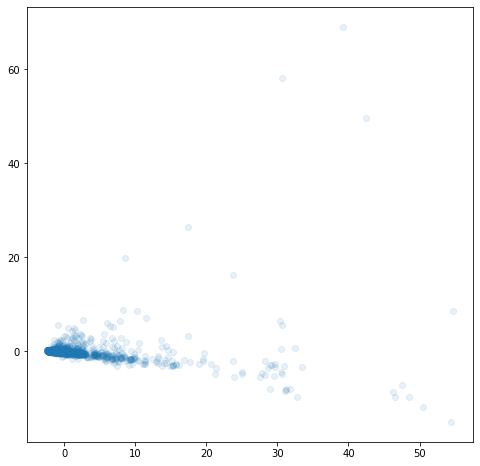

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
           alpha=.1)

Plot first three components.

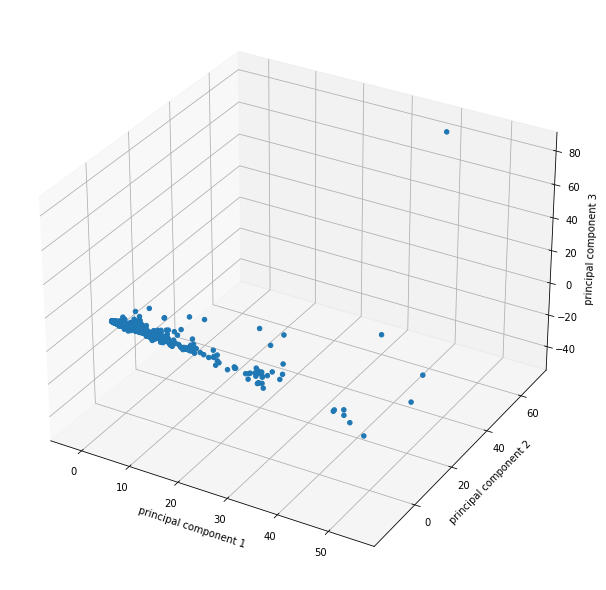

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

xx = principalDf['principal component 1']
yy = principalDf['principal component 2']
zz = principalDf['principal component 3']

ax.scatter(xx, yy, zz, alpha=1)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
plt.show()

So even though the first three principal components only explain approximately 40 percent of the data, it still has enough structure. In fact, by decreasing the opacity of points we see the majority of sample points follow the trajectory of principal component 1.

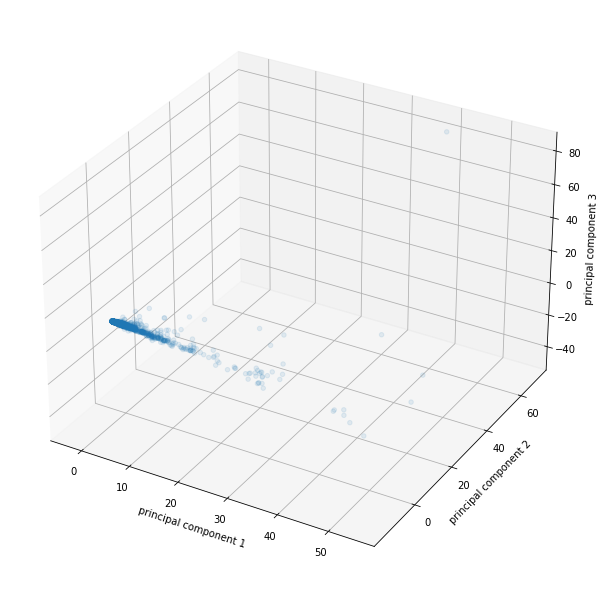

In [42]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

xx = principalDf['principal component 1']
yy = principalDf['principal component 2']
zz = principalDf['principal component 3']

ax.scatter(xx, yy, zz, alpha=.1)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
plt.show()

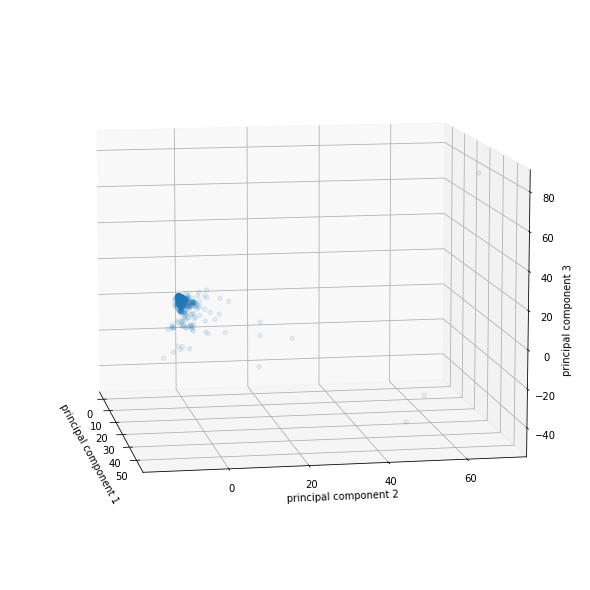

In [43]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

xx = principalDf['principal component 1']
yy = principalDf['principal component 2']
zz = principalDf['principal component 3']

ax.scatter(xx, yy, zz, alpha=.1)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')

ax.view_init(10, -10)

plt.show()

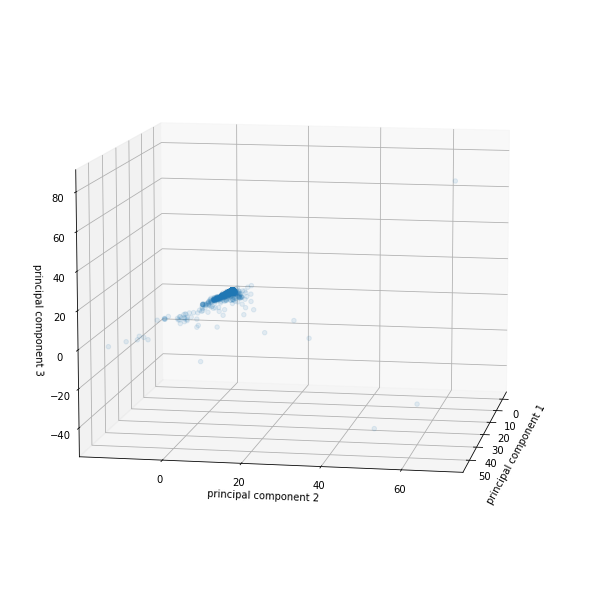

In [44]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

xx = principalDf['principal component 1']
yy = principalDf['principal component 2']
zz = principalDf['principal component 3']

ax.scatter(xx, yy, zz, alpha=.1)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')

ax.view_init(10, 10)

plt.show()

## Analysis of Principal Components

We can verify that the singular values agree with our eigen decomposition. However, principal components will be obained via SVD due to numerical stability.

In [45]:
from opioid_crisis_lib import threshold_pass

In [46]:
u, s, vh = np.linalg.svd(sample_standardized.T, full_matrices=False)
eigen_values_hat = s**2/(3007-1)
eigen_values_hat

array([2.36425564e+01, 4.96590578e+00, 3.80514198e+00, 2.77826178e+00,
       2.29549614e+00, 2.16952338e+00, 1.83002101e+00, 1.69590160e+00,
       1.62867065e+00, 1.39011149e+00, 1.30684377e+00, 1.21671917e+00,
       1.19463233e+00, 1.15220839e+00, 1.14031665e+00, 1.07086311e+00,
       1.04817149e+00, 1.03912968e+00, 1.02172269e+00, 1.01787922e+00,
       1.00880811e+00, 1.00508395e+00, 1.00333913e+00, 1.00158195e+00,
       9.97595710e-01, 9.85127104e-01, 9.65243089e-01, 9.50948286e-01,
       9.39442730e-01, 8.94851559e-01, 8.55921870e-01, 8.25950848e-01,
       8.10445594e-01, 7.94837472e-01, 7.49742952e-01, 7.25376807e-01,
       7.18744217e-01, 6.66893924e-01, 6.21338107e-01, 5.95494892e-01,
       5.82717327e-01, 5.54103723e-01, 4.92176953e-01, 4.27007814e-01,
       4.20722633e-01, 4.01636201e-01, 3.89380645e-01, 3.02831569e-01,
       2.90759485e-01, 2.79839950e-01, 2.55217530e-01, 2.14738867e-01,
       1.66961540e-01, 1.43826275e-01, 1.38460844e-01, 1.06766360e-01,
      

The principal components.

In [47]:
pc_svd = np.matmul(u, np.diag(s))
pc_svd.T[1]

array([-1.00982031e+01, -1.37893723e+00,  4.19946873e+00,  3.82696856e+00,
        5.55332183e+00,  2.55427512e+00,  1.05576779e+01,  2.78848167e+00,
        3.79469524e+00,  2.44665753e+00,  1.05821047e+01, -1.06325105e+00,
        1.05576779e+01,  2.87499004e+00,  2.60825618e+00,  2.89136751e+00,
        2.29298252e+00,  2.89136751e+00,  9.11523916e+00,  4.04973935e+00,
        1.05576629e+01,  4.17494248e+00,  2.92965538e+00,  1.55078871e+00,
       -2.95384729e-01, -6.62256378e+00, -1.00676923e+01, -2.23301286e+01,
       -3.68346565e+01,  1.91335054e+00, -1.19743562e+00, -1.78789702e+01,
        6.76296381e+00, -8.95234527e+00,  2.22924490e-02, -8.57157465e+00,
       -3.43827905e+01,  9.29578670e+00, -7.44313837e-01,  2.36316239e+00,
       -4.14809165e+00, -1.67760951e+00,  1.62072348e-01, -4.27167765e+01,
       -1.03938344e+00, -1.10729153e+01, -2.60554645e+01, -3.08587129e+01,
       -2.71315137e-02, -1.13955446e+01,  6.92129277e-01,  3.32348049e+00,
        2.17953629e+00, -

Extract singular values.

In [48]:
pc_svd = np.matmul(u, np.diag(s))
pc_svd.T, pc_svd.T.shape

(array([[ 3.59016262e-01,  1.33680906e+01,  9.89820628e+00, ...,
          8.59796135e+00,  8.07320515e+00,  8.07320515e+00],
        [-1.00982031e+01, -1.37893723e+00,  4.19946873e+00, ...,
         -2.21090168e+01, -3.09981196e+01, -3.09981196e+01],
        [ 1.56677067e+00, -1.40534362e-01, -3.01866159e+00, ...,
          2.32970777e+01, -4.19619020e+01, -4.19619020e+01],
        ...,
        [ 5.52234189e-31,  1.07591246e-30, -2.58927154e-30, ...,
         -1.59427609e-30,  8.04708581e-15,  6.28922611e-15],
        [-2.54507931e-31, -3.53441693e-30, -7.61111743e-32, ...,
         -2.76597298e-30,  8.50680687e-16,  3.11007577e-15],
        [-5.57036226e-31, -4.03629593e-31, -5.46372343e-31, ...,
         -2.07447974e-30, -1.53192672e-14,  1.57285701e-14]]),
 (80, 80))

We look at each of the singular values and see what is going on.

In [49]:
from opioid_crisis_lib import pc_explain
pc_explain(0, pc_svd, 30, nonzero_features)

[('Estimate; ANCESTRY - Total population', 52.229135108265176),
 ('Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over',
  53.57955568470832),
 ('Estimate; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months',
  53.969450431313696),
 ('Estimate; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years',
  45.15319996235314),
 ('Estimate; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years',
  53.926116724048406),
 ('Estimate; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over',
  53.50293480539324),
 ('Estimate; HOUSEHOLDS BY TYPE - Households with one or more people under 18 years',
  53.910552089874855),
 ('Estimate; HOUSEHOLDS BY TYPE - Total households', 46.36101138120255),
 ('Estimate; LANGUAGE SPOKEN AT HOME - Population 5 years and over',
  52.41687277446641),
 ('Estimate; MARITAL STATUS - Females 15 years and over', 45.153199962353156),
 ('Estimate; M

Conclusion (PCA1): as the total population decreases, the total population decreases.

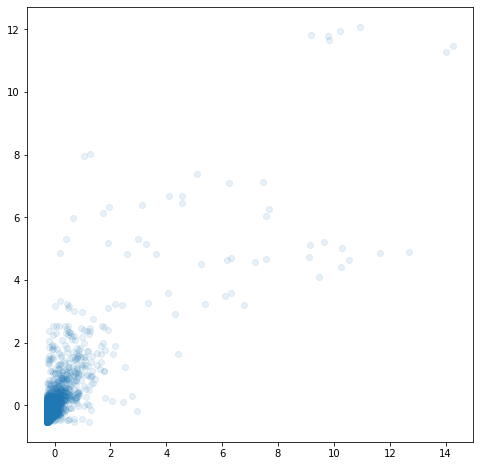

In [50]:
lab1 = 'Heroin'
lab2 = 'Estimate; ANCESTRY - Total population'
plt.figure(figsize=(8, 8))
plt.scatter(df_standardized[lab1], df_standardized[lab2], alpha=.1)
plt.show()

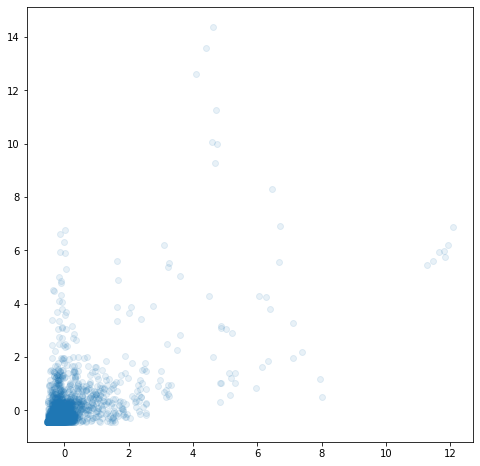

In [51]:
lab1 = 'Estimate; ANCESTRY - Total population'
lab2 = 'Buprenorphine'
plt.figure(figsize=(8, 8))
plt.scatter(df_standardized[lab1], df_standardized[lab2], alpha=.1)
plt.show()

In [52]:
pc_explain(1, pc_svd, 20, nonzero_features)

[('ANPP', -22.330128578683173),
 ('Acetyl fentanyl', -36.834656512436524),
 ('Carfentanil', -34.38279048491356),
 ('Fentanyl', -42.716776476976946),
 ('Fluoroisobutyryl fentanyl', -26.055464457866716),
 ('Furanyl fentanyl', -30.858712948207845),
 ('Levorphanol', -23.985144204395624),
 ('U-47700', -36.332222777497186),
 ('Valeryl fentanyl', -23.690070716214397),
 ('cis-3-methylfentanyl', -30.998119588414006),
 ('p-Fluorofentanyl', -22.109016840435288),
 ('p-methoxybutyryl fentanyl', -30.998119588414006),
 ('trans-3-Methylfentanyl', -30.998119588414006)]

Conclusion (PCA2): in general, increase in population and married couples decreases use of various drugs.

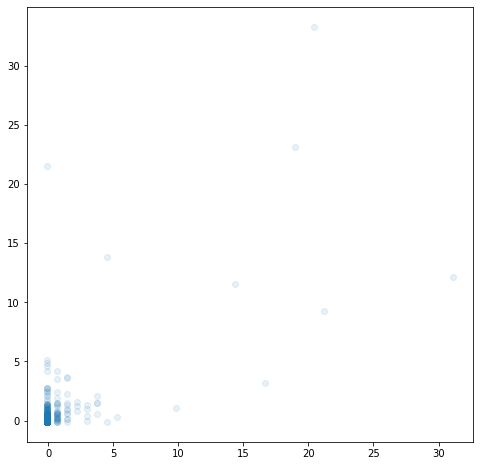

In [53]:
lab1 = 'U-47700'
lab2 = 'Fentanyl'
plt.figure(figsize=(8, 8))
plt.scatter(df_standardized[lab1], df_standardized[lab2], alpha=.1)
# plt.ylim(0, 10)
plt.show()

In [54]:
pc_explain(2, pc_svd, 10, nonzero_features)

[('4-Fluoroisobutyryl fentanyl', -10.0177112982804),
 ('ANPP', 23.631514605060193),
 ('Acetyl fentanyl', 19.25161834255942),
 ('Acryl fentanyl', 15.415222691045509),
 ('Carfentanil', 27.72346756552149),
 ('Fentanyl', 19.965319242258467),
 ('Fluoroisobutyryl fentanyl', 20.285032772388934),
 ('Levorphanol', -34.73667969114062),
 ('Opiates', 11.532054667407994),
 ('U-47700', 10.434529200689246),
 ('Valeryl fentanyl', -28.176757510426512),
 ('cis-3-methylfentanyl', -41.96190199677897),
 ('p-Fluorofentanyl', 23.29707774608397),
 ('p-methoxybutyryl fentanyl', -41.96190199677896),
 ('trans-3-Methylfentanyl', -41.96190199677897)]

These drugs go along with each other.

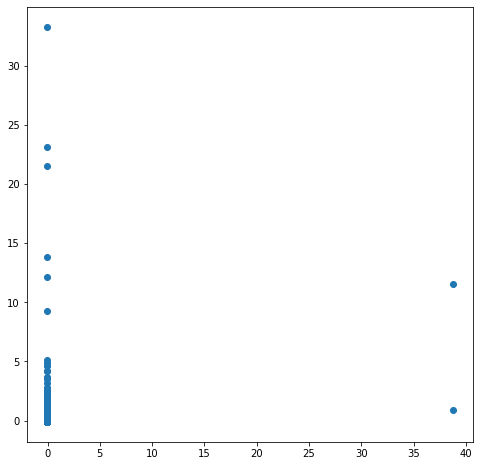

In [55]:
lab1 = 'Levorphanol'
lab2 = 'Fentanyl'
plt.figure(figsize=(8, 8))
plt.scatter(df_standardized[lab1], df_standardized[lab2], alpha=1)
# plt.ylim(0, 10)
plt.show()

In reality, the relations implied by the second and third principal components are not very meaningful, because they are mostly influenced by outliers. A more appropriate approach may be to remove those outliers and retry the PCA.

# PCA - Total Drug Reports

In this section we perform PCA with all drug features lumped into one feature, known as `'total drug use'`.

Note that the first 24 features are non-drug related features.

In [56]:
nonzero_features[24:]

array(['3-Fluorofentanyl', '3-Methylfentanyl',
       '4-Fluoroisobutyryl fentanyl', 'ANPP', 'Acetyl fentanyl',
       'Acetylcodeine', 'Acetyldihydrocodeine', 'Acryl fentanyl',
       'Alphaprodine', 'Buprenorphine', 'Butorphanol', 'Butyryl fentanyl',
       'Carfentanil', 'Codeine', 'Cyclopropyl fentanyl',
       'Desmethylprodine ', 'Dextropropoxyphene', 'Dihydrocodeine',
       'Dihydromorphone', 'Fentanyl', 'Fluorobutyryl fentanyl ',
       'Fluorofentanyl', 'Fluoroisobutyryl fentanyl', 'Furanyl fentanyl',
       'Furanyl/3-Furanyl fentanyl', 'Heroin', 'Hydrocodeinone',
       'Hydrocodone', 'Hydromorphone', 'Levorphanol', 'MT-45',
       'Meperidine', 'Methadone', 'Methorphan', 'Mitragynine', 'Morphine',
       'Nalbuphine', 'Opiates', 'Opium', 'Oxycodone', 'Oxymorphone',
       'Pentazocine', 'Pethidine', 'Propoxyphene', 'Remifentanil',
       'Tetrahydrofuran fentanyl', 'Thebaine', 'Tramadol', 'U-47700',
       'Valeryl fentanyl', 'cis-3-methylfentanyl', 'o-Fluorofentanyl',
   

We construct a matrix with 25 features, the first 24 non-drug, and the 25th is the total drug use feature.

In [57]:
sample_nz.T[24:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
sampleTotalDrug = np.concatenate((sample_nz.T[:24].T, np.zeros((sample_nz.shape[0], 1))), 1)
sampleTotalDrug.T[24] = np.sum(sample_nz.T[24:], axis=0)
sampleTotalDrug

array([[ 2.0100000e+03,  3.7105559e+01, -8.5281380e+01, ...,
         1.7550000e+04,  7.2720000e+03,  7.0000000e+00],
       [ 2.0100000e+03,  3.6750770e+01, -8.6192458e+01, ...,
         1.9274000e+04,  7.8110000e+03,  3.0000000e+01],
       [ 2.0100000e+03,  3.8005396e+01, -8.4986417e+01, ...,
         2.0899000e+04,  8.3190000e+03,  3.4000000e+01],
       ...,
       [ 2.0160000e+03,  3.9020034e+01, -8.1382975e+01, ...,
         5.8260000e+03,  2.4320000e+03,  1.0000000e+00],
       [ 2.0160000e+03,  3.9211602e+01, -8.1516234e+01, ...,
         8.5367000e+04,  3.6225000e+04,  1.9000000e+02],
       [ 2.0160000e+03,  3.7603660e+01, -8.1549032e+01, ...,
         2.2458000e+04,  9.2220000e+03,  1.0000000e+00]])

The last row is the total drug report for a sample observation.

In [59]:
featuresTotalDrug = np.copy(nonzero_features[:25])
featuresTotalDrug[24] = "Total Drug Reports"
dfTotalDrug = pd.DataFrame(sampleTotalDrug, index=sample_point_id, columns=featuresTotalDrug)
dfTotalDrug

,Year,INTPTLAT,INTPTLONG,Estimate; ANCESTRY - Total population,Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over,Estimate; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months,Estimate; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years,Estimate; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years,Estimate; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over,Estimate; HOUSEHOLDS BY TYPE - Households with one or more people under 18 years,...,Estimate; RELATIONSHIP - Population in households,Estimate; RESIDENCE 1 YEAR AGO - Population 1 year and over,Estimate; SCHOOL ENROLLMENT - Population 3 years and over enrolled in school,Estimate; U.S. CITIZENSHIP STATUS - Foreign-born population,Estimate; VETERAN STATUS - Civilian population 18 years and over,"Estimate; WORLD REGION OF BIRTH OF FOREIGN BORN - Foreign-born population, excluding population born at sea",Estimate; YEAR OF ENTRY - Foreign born,Estimate; YEAR OF ENTRY - Native,Estimate; YEAR OF ENTRY - Population born outside the United States,Total Drug Reports
"(2010, ky, Adair)",2010.0,37.105559,-85.281380,236.0,271.0,7646.0,127.0,17429.0,2258.0,14321.0,...,18542.0,12228.0,18542.0,85.0,278.0,127.0,4541.0,17550.0,7272.0,7.0
"(2010, ky, Allen)",2010.0,36.750770,-86.192458,314.0,477.0,8114.0,325.0,18374.0,2662.0,14808.0,...,19688.0,13142.0,19688.0,290.0,404.0,325.0,4549.0,19274.0,7811.0,30.0
"(2010, ky, Anderson)",2010.0,38.005396,-84.986417,369.0,517.0,8681.0,363.0,19691.0,3137.0,15663.0,...,21080.0,14156.0,21080.0,113.0,261.0,363.0,5407.0,20899.0,8319.0,34.0
"(2010, ky, Ballard)",2010.0,37.051323,-89.010367,51.0,51.0,3416.0,92.0,7770.0,1064.0,6376.0,...,8225.0,5791.0,8225.0,22.0,134.0,92.0,1911.0,8225.0,3363.0,1.0
"(2010, ky, Barren)",2010.0,36.962805,-85.932108,605.0,1109.0,17435.0,620.0,38993.0,5565.0,31524.0,...,41685.0,28523.0,41685.0,103.0,710.0,620.0,9693.0,41103.0,16727.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(2016, wv, Webster)",2016.0,38.483459,-80.449052,206.0,479.0,3716.0,24.0,8318.0,1154.0,7028.0,...,8820.0,6404.0,8820.0,8.0,85.0,24.0,1492.0,8763.0,3952.0,19.0
"(2016, wv, Wetzel)",2016.0,39.598180,-80.635399,182.0,378.0,6855.0,71.0,15191.0,1435.0,12696.0,...,15997.0,11471.0,15997.0,16.0,191.0,71.0,3021.0,15880.0,6238.0,2.0
"(2016, wv, Wirt)",2016.0,39.020034,-81.382975,16.0,37.0,2347.0,0.0,5521.0,545.0,4579.0,...,5826.0,4144.0,5826.0,9.0,71.0,0.0,1102.0,5826.0,2432.0,1.0
"(2016, wv, Wood)",2016.0,39.211602,-81.516234,862.0,1718.0,37140.0,864.0,81356.0,10278.0,67872.0,...,86262.0,61176.0,86262.0,350.0,1175.0,864.0,18959.0,85367.0,36225.0,190.0


In [60]:
dfTotalDrugStandardized = pd.DataFrame(standardize(dfTotalDrug),
                                       index=sample_point_id,
                                       columns=featuresTotalDrug)

u, s, vh = np.linalg.svd(dfTotalDrugStandardized.T, full_matrices=False)
pc_svd = np.matmul(u, np.diag(s))
pc_svd.T[0]

array([ -0.48016173, -14.47161139, -11.07791228, -51.61226148,
       -53.67769665, -54.37096303, -46.91627353, -54.41213069,
       -54.19399968, -54.34912884, -47.99649092, -52.62146936,
       -46.91627353, -54.43570317, -54.3640657 , -54.44104503,
       -54.3217074 , -54.44104503, -47.14761153, -52.49050296,
       -46.91626747, -54.42236059, -54.45272327, -54.01069139,
       -43.5739967 ])

In [61]:
pc_explain(0, pc_svd, 40, featuresTotalDrug)

[('Estimate; ANCESTRY - Total population', -51.61226148434929),
 ('Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over',
  -53.677696653431994),
 ('Estimate; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months',
  -54.370963026111426),
 ('Estimate; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years',
  -46.91627353306665),
 ('Estimate; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years',
  -54.41213068593269),
 ('Estimate; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over',
  -54.193999684185556),
 ('Estimate; HOUSEHOLDS BY TYPE - Households with one or more people under 18 years',
  -54.34912884063024),
 ('Estimate; HOUSEHOLDS BY TYPE - Total households', -47.99649091631677),
 ('Estimate; LANGUAGE SPOKEN AT HOME - Population 5 years and over',
  -52.621469360968426),
 ('Estimate; MARITAL STATUS - Females 15 years and over', -46.91627353306665),
 ('Es

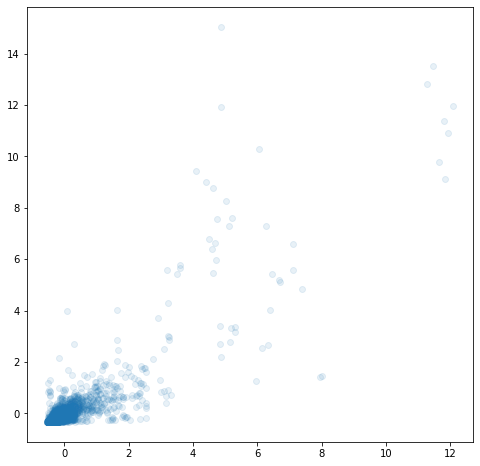

In [62]:
lab1 = 'Estimate; ANCESTRY - Total population'
lab2 = 'Total Drug Reports'
plt.figure(figsize=(8, 8))
plt.scatter(dfTotalDrugStandardized[lab1], dfTotalDrugStandardized[lab2], alpha=.1)
plt.show()

In [63]:
pc_explain(1, pc_svd, 10, featuresTotalDrug)

[('INTPTLAT', -25.483147697391292),
 ('Estimate; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years',
  26.959057914745873),
 ('Estimate; HOUSEHOLDS BY TYPE - Total households', 25.480331565622432),
 ('Estimate; LANGUAGE SPOKEN AT HOME - Population 5 years and over',
  -12.21812301742418),
 ('Estimate; MARITAL STATUS - Females 15 years and over', 26.95905791474587),
 ('Estimate; U.S. CITIZENSHIP STATUS - Foreign-born population',
  12.742531067452289),
 ('Estimate; WORLD REGION OF BIRTH OF FOREIGN BORN - Foreign-born population, excluding population born at sea',
  26.959055391964323),
 ('Total Drug Reports', -14.75513893643052)]

## Analysis of only Drug Reports

It's possible that the high correlations between socioeconomic factors are "crowding out" the drug use factors. In this case we'll perform analysis on the drugs. This may reveal economic patterns.

In [64]:
dfDrugReports = df_standardized[nonzero_features[24:]]
u, s, vh = np.linalg.svd(dfDrugReports.T, full_matrices=False)
pc_svd = np.matmul(u, np.diag(s))
pc_svd.T[0]

array([-1.99827499e-02, -8.37725002e+00, -7.26747812e+00, -2.04325669e+01,
       -3.39963719e+01, -1.30225065e+01, -1.68637144e+01, -1.45708972e+01,
       -1.20339604e+01, -3.72100449e+01, -5.53043470e-01, -8.06405996e+00,
       -2.71249349e+01, -2.93573646e+01, -2.30004407e-01, -7.38362644e+00,
       -1.08895734e+01, -7.29641035e+00, -1.00851038e-01, -3.97045314e+01,
       -2.86238089e-01, -8.36311865e+00, -1.97177147e+01, -2.49699799e+01,
       -3.50269292e-02, -4.49228682e+01,  2.42481703e-01, -3.09774325e+01,
       -1.02520965e+01, -1.78780425e+01, -1.04289274e+01, -1.04693870e+01,
       -3.53072169e+01, -1.07183271e+01, -1.07658843e+01, -3.61471005e+01,
       -3.79107048e-01, -9.50792332e+00, -3.08740845e+00, -3.71538098e+01,
       -1.67745127e+01, -6.28952898e+00, -3.48233509e+00, -2.37109691e+01,
       -4.40126900e+00, -1.03639725e+00, -6.93319103e-01, -3.15031330e+01,
       -3.21193831e+01, -1.67577550e+01, -1.94345989e+01, -4.38443988e+00,
       -2.84140336e+00, -

In [65]:
pc_explain(0, pc_svd, 0, nonzero_features[24:])

[('3-Fluorofentanyl', -0.019982749942057166),
 ('3-Methylfentanyl', -8.377250018936271),
 ('4-Fluoroisobutyryl fentanyl', -7.26747811647246),
 ('ANPP', -20.43256691452748),
 ('Acetyl fentanyl', -33.99637193913303),
 ('Acetylcodeine', -13.02250654175497),
 ('Acetyldihydrocodeine', -16.86371436497683),
 ('Acryl fentanyl', -14.570897167096835),
 ('Alphaprodine', -12.033960436811077),
 ('Buprenorphine', -37.210044888400965),
 ('Butorphanol', -0.5530434704880335),
 ('Butyryl fentanyl', -8.064059963514662),
 ('Carfentanil', -27.124934913631),
 ('Codeine', -29.357364619890145),
 ('Cyclopropyl fentanyl', -0.23000440682034198),
 ('Desmethylprodine ', -7.3836264426695735),
 ('Dextropropoxyphene', -10.889573366704079),
 ('Dihydrocodeine', -7.296410352346465),
 ('Dihydromorphone', -0.10085103782890549),
 ('Fentanyl', -39.70453144343192),
 ('Fluorobutyryl fentanyl ', -0.2862380885199109),
 ('Fluorofentanyl', -8.36311864829801),
 ('Fluoroisobutyryl fentanyl', -19.717714684138375),
 ('Furanyl fentany

As we see in the principal components: the increased use of one drug seems to be correlated to the increased use of another.

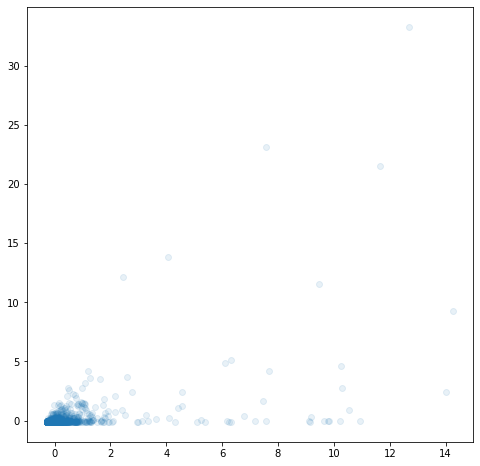

In [66]:
lab1 = 'Heroin'
lab2 = 'Fentanyl'
plt.figure(figsize=(8, 8))
plt.scatter(dfDrugReports[lab1], dfDrugReports[lab2], alpha=.1)
plt.show()

## Analysis of only Socio-Economic Data

Since we're already here, we might as well take a look at the socio-economic data (without drug factors).

In [67]:
dfSoc = df_standardized[nonzero_features[:24]]
u, s, vh = np.linalg.svd(dfSoc.T, full_matrices=False)
pc_svd = np.matmul(u, np.diag(s))
pc_svd.T[0]

array([ -0.37826759, -14.55639058, -11.30404496, -51.35412399,
       -53.58097626, -54.31311655, -47.25861329, -54.37585265,
       -54.22177815, -54.29903546, -48.30003227, -52.49744172,
       -47.25861329, -54.40019389, -54.33465163, -54.40555912,
       -54.28712664, -54.40555912, -47.17258264, -52.45666612,
       -47.25860631, -54.39995043, -54.42246802, -53.93306176])

In [68]:
pc_explain(0, pc_svd, 50, nonzero_features[:24])

[('Estimate; ANCESTRY - Total population', -51.35412398827705),
 ('Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over',
  -53.58097626014962),
 ('Estimate; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months',
  -54.313116549208516),
 ('Estimate; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years',
  -54.375852652962976),
 ('Estimate; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over',
  -54.22177814973553),
 ('Estimate; HOUSEHOLDS BY TYPE - Households with one or more people under 18 years',
  -54.29903546277834),
 ('Estimate; LANGUAGE SPOKEN AT HOME - Population 5 years and over',
  -52.49744171945255),
 ('Estimate; MARITAL STATUS - Males 15 years and over', -54.4001938915925),
 ('Estimate; PLACE OF BIRTH - Total population', -54.334651626974484),
 ('Estimate; RELATIONSHIP - Population in households', -54.405559118992784),
 ('Estimate; RESIDENCE 1 YEAR AGO - Population 1 year and

In [69]:
pc_explain(1, pc_svd, 10, nonzero_features[:24])

[('INTPTLAT', -31.958245202529465),
 ('Estimate; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years',
  25.00708513093195),
 ('Estimate; HOUSEHOLDS BY TYPE - Total households', 23.684659918956473),
 ('Estimate; LANGUAGE SPOKEN AT HOME - Population 5 years and over',
  -12.266934059057563),
 ('Estimate; MARITAL STATUS - Females 15 years and over', 25.00708513093195),
 ('Estimate; U.S. CITIZENSHIP STATUS - Foreign-born population',
  12.15641507046801),
 ('Estimate; WORLD REGION OF BIRTH OF FOREIGN BORN - Foreign-born population, excluding population born at sea',
  25.007087254768173)]

Nothing interesting.

## Color-coded maps

Let's identify the points by color: VA blue, OH green, PA orange, KY red, WV black.

We will work with the original dataset. (Doesn't need to be standardized, since it's a visualization)

In [70]:
df_sample = pd.DataFrame(sample_nz, index=sample_point_id_join,
                              columns=nonzero_features)

In [71]:
state_initials = np.array([a.split()[1] for a in sample_point_id_join])

vaIndex = list(filter(lambda i: state_initials[i] == 'va', range(len(state_initials))))
ohIndex = list(filter(lambda i: state_initials[i] == 'oh', range(len(state_initials))))
paIndex = list(filter(lambda i: state_initials[i] == 'pa', range(len(state_initials))))
kyIndex = list(filter(lambda i: state_initials[i] == 'ky', range(len(state_initials))))
wvIndex = list(filter(lambda i: state_initials[i] == 'wv', range(len(state_initials))))

states = ['va', 'oh', 'pa', 'ky', 'wv']
stateIndexList = [vaIndex, ohIndex, paIndex, kyIndex, wvIndex]
colorList = ['blue', 'green', 'orange', 'red', 'black']

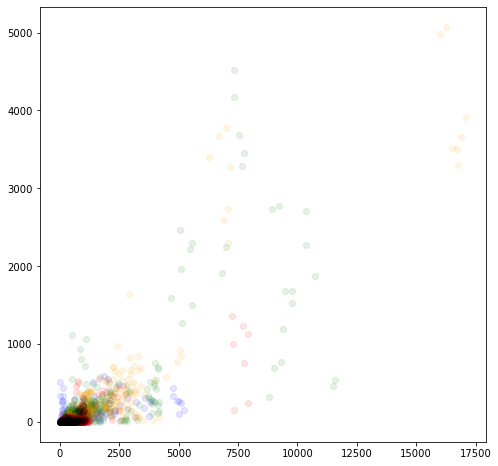

In [72]:
plt.figure(figsize=(8, 8))

lab1 = 'Estimate; ANCESTRY - Total population'
lab2 = 'Heroin'

for i in range(5):
    index = stateIndexList[i]
    plt.scatter(df_sample[lab1][index], df_sample[lab2][index], alpha=.1, color=colorList[i])
    
plt.show()

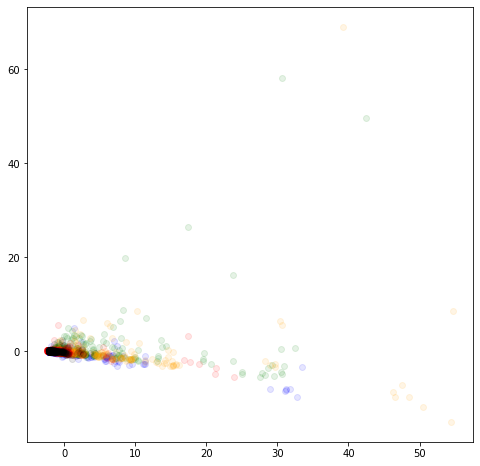

In [73]:
plt.figure(figsize=(8, 8))

for i in range(5):
    index = stateIndexList[i]
    plt.scatter(principalDf['principal component 1'][index],
                principalDf['principal component 2'][index], alpha=.1, color=colorList[i])
    
plt.show()

# PCA on percentages

This was probably the right thing to do in the first place, since PCA deals with mostly "scores".

`feature_extract2` extracts only percentage features.

In [74]:
from opioid_crisis_lib import feature_extract2
f_index2 = feature_index2(ddf_yyyy, ddf_metadata_yyyy, extraction=feature_extract2)
sorted(f_index2)

['Percent; ANCESTRY - Total population',
 "Percent; EDUCATIONAL ATTAINMENT - Percent bachelor's degree or higher",
 'Percent; EDUCATIONAL ATTAINMENT - Percent high school graduate or higher',
 'Percent; EDUCATIONAL ATTAINMENT - Population 25 years and over',
 'Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months',
 'Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years',
 'Percent; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years',
 'Percent; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over',
 'Percent; HOUSEHOLDS BY TYPE - Households with one or more people under 18 years',
 'Percent; HOUSEHOLDS BY TYPE - Total households',
 'Percent; LANGUAGE SPOKEN AT HOME - Population 5 years and over',
 'Percent; MARITAL STATUS - Females 15 years and over',
 'Percent; MARITAL STATUS - Males 15 years and over',
 'Percent; PLACE OF BIRTH - Total population',
 

In [75]:
# from opioid_crisis_lib import generate_sample
# sample2 = generate_sample(ddf_yyyy, ddf_metadata_yyyy, f_index2, df_nflis, substanceNamesDict, df_geo)
# np.savetxt("please_dont_overwrite3.csv", sample2, delimiter=",")

In [76]:
sample_read2 = pd.read_csv('please_dont_overwrite3.csv', header=None)
sample_read2_np = sample_read2.to_numpy()
nonzero_index, zero_index = find_nonzero(sample_read2_np.T)
geo_features = np.array(["INTPTLAT", "INTPTLONG                                                                                                               "])
features2 = np.concatenate((["Year"], geo_features, 
                          sorted(f_index2),
                          sorted(substanceNamesDict)))

nonzero_features = features2[nonzero_index]
sample_nz2_col = keep_cols(sample_read2_np, nonzero_index)
keep_row_indices = np.argwhere(~np.isnan(sample_nz_col.T[1])).T[0]

sample_nz2 = sample_nz2_col[keep_row_indices][:]
sample_point_id = identify_sample_points(keep_row_indices, ddf_yyyy)
sample_point_id_join = np.array([' '.join(sample_point_id[i]) for i in range(len(sample_point_id))])

In [77]:
df_percentage = pd.DataFrame(sample_nz2,
                            index=sample_point_id_join,
                            columns=nonzero_features)

df_percentage_standardized = pd.DataFrame(standardize(df_percentage),
                            index=sample_point_id_join,
                            columns=nonzero_features)

df_percentage_standardized

,Year,INTPTLAT,INTPTLONG,Percent; ANCESTRY - Total population,Percent; EDUCATIONAL ATTAINMENT - Percent bachelor's degree or higher,Percent; EDUCATIONAL ATTAINMENT - Percent high school graduate or higher,Percent; EDUCATIONAL ATTAINMENT - Population 25 years and over,Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months,Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years,Percent; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years,...,Thebaine,Tramadol,U-47700,Valeryl fentanyl,cis-3-methylfentanyl,o-Fluorofentanyl,p-Fluorobutyryl fentanyl,p-Fluorofentanyl,p-methoxybutyryl fentanyl,trans-3-Methylfentanyl
2010 ky Adair,-1.499128,-1.124983,-1.169332,-0.389475,-0.389894,-0.245084,-0.419079,-0.341590,-0.232973,-0.372445,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2010 ky Allen,-1.499128,-1.357923,-1.445458,-0.379110,-0.383979,-0.187972,-0.833017,-0.283531,-0.216546,-0.372268,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2010 ky Anderson,-1.499128,-0.534185,-1.079935,-0.369341,-0.375735,-0.237284,-0.103178,-0.349424,-0.222212,-0.353267,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2010 ky Ballard,-1.499128,-1.160592,-2.299502,-0.445535,-0.450355,-0.262636,-0.822124,-0.407944,-0.236967,-0.430686,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2010 ky Barren,-1.499128,-1.218709,-1.366552,-0.247878,-0.254915,-0.240070,-0.353720,-0.142529,-0.212144,-0.258353,...,-0.034621,0.070325,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016 wv Webster,1.501123,-0.220307,0.295237,-0.442301,-0.446925,-0.266536,-0.985521,-0.430523,-0.240310,-0.439965,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2016 wv Wetzel,1.501123,0.511575,0.238759,-0.399514,-0.403903,-0.264308,-0.822124,-0.381679,-0.238068,-0.406105,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2016 wv Wirt,1.501123,0.131987,0.012186,-0.459957,-0.464432,-0.266258,-0.931055,-0.436974,-0.241247,-0.448602,...,-0.034621,-0.280077,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239
2016 wv Wood,1.501123,0.257763,-0.028202,0.018230,0.010256,-0.171256,0.223615,0.071738,-0.192130,-0.053157,...,-0.034621,0.420727,-0.074384,-0.050605,-0.018239,-0.04259,-0.042152,-0.020991,-0.018239,-0.018239


In [78]:
u, s, vh = np.linalg.svd(df_percentage_standardized.T, full_matrices=False)
pc_svd = np.matmul(u, np.diag(s))

In [79]:
pc_explain(0, pc_svd, 40, nonzero_features)

[('Percent; ANCESTRY - Total population', -53.79690988374852),
 ("Percent; EDUCATIONAL ATTAINMENT - Percent bachelor's degree or higher",
  -53.76898265237011),
 ('Percent; EDUCATIONAL ATTAINMENT - Percent high school graduate or higher',
  -46.614135810079645),
 ('Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months',
  -52.079026983371804),
 ('Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years',
  -46.609941200562865),
 ('Percent; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years',
  -53.83501990680481),
 ('Percent; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over',
  -45.422545707112256),
 ('Percent; HOUSEHOLDS BY TYPE - Households with one or more people under 18 years',
  -53.802972214539295),
 ('Percent; HOUSEHOLDS BY TYPE - Total households', -53.79222655473883),
 ('Percent; MARITAL STATUS - Males 15 years and over', -53.8029722145393),


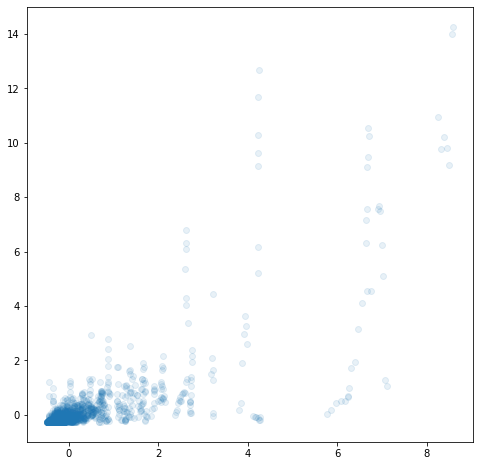

In [80]:
lab1 = 'Percent; ANCESTRY - Total population'
lab2 = 'Heroin'
# lab2 = 'Percent; MARITAL STATUS - Males 15 years and over'

plt.figure(figsize=(8, 8))
plt.scatter(df_percentage_standardized[lab1], df_percentage_standardized[lab2], alpha=.1)
plt.show()

Comparison with total population count. Notice that patterns are more pronounced in percentage plots.

In [81]:
from opioid_crisis_lib import compare_plots

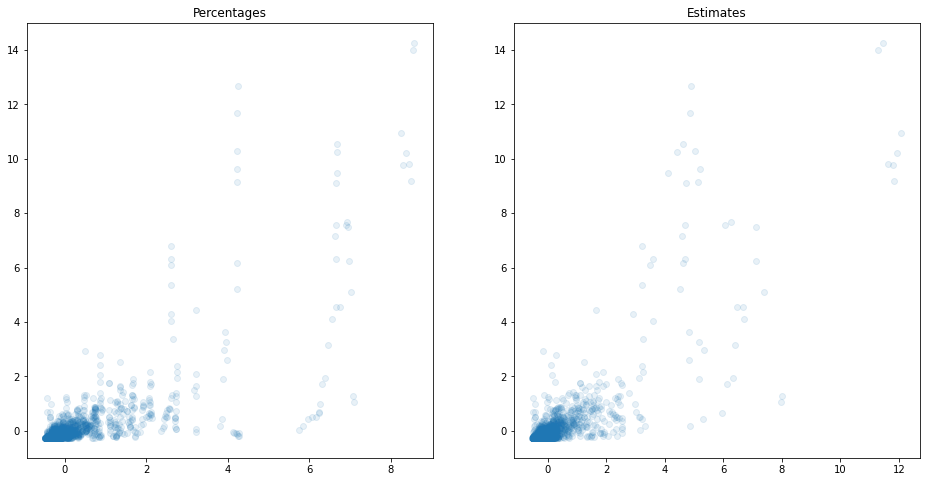

In [82]:
lab1a = 'Percent; ANCESTRY - Total population'
lab1b = 'Estimate; ANCESTRY - Total population'
lab2 = 'Heroin'
compare_plots(lab1a, lab1b,
              lab2, lab2,
              df_percentage_standardized, df_standardized,
              'Percentages', 'Estimates')

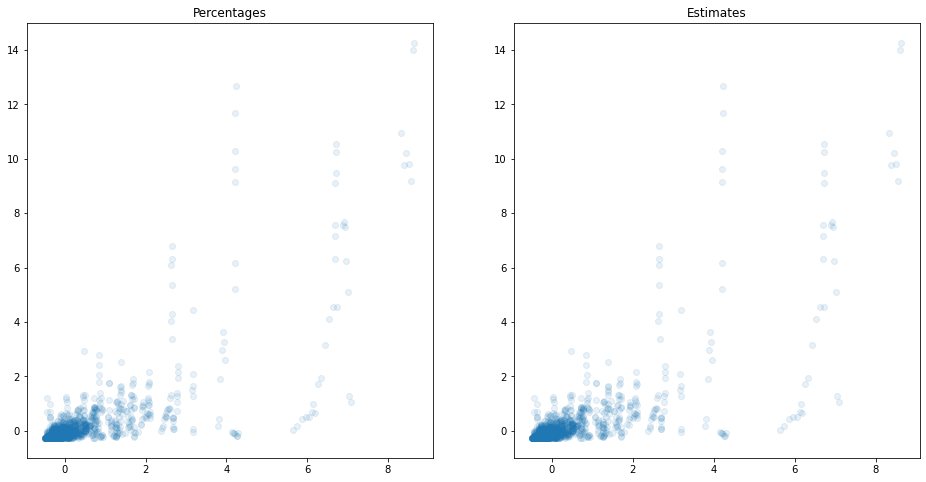

In [83]:
# lab1a = 'Percent; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over'
# lab1b = 'Estimate; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over'

lab1a = 'Percent; MARITAL STATUS - Males 15 years and over'
lab1b = 'Estimate; MARITAL STATUS - Males 15 years and over'

lab2 = 'Heroin'
compare_plots(lab1a, lab1b,
              lab2, lab2,
              df_percentage_standardized, df_standardized,
              'Percentages', 'Estimates')

In [84]:
pc_explain(1, pc_svd, 10, nonzero_features)

[('Year', 10.720795347710254),
 ('Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years',
  -10.606406447683437),
 ('Percent; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over',
  -10.620440232044801),
 ('Percent; PLACE OF BIRTH - Total population', -10.620421622247944),
 ('Percent; RESIDENCE 1 YEAR AGO - Population 1 year and over',
  -10.620440232044801),
 ('4-Fluoroisobutyryl fentanyl', 10.079327441554055),
 ('ANPP', 22.334918978015338),
 ('Acetyl fentanyl', 36.7917416777989),
 ('Acryl fentanyl', 17.872899051170304),
 ('Carfentanil', 34.22373126249208),
 ('Fentanyl', 42.63976583321922),
 ('Fluorofentanyl', 11.014862525383798),
 ('Fluoroisobutyryl fentanyl', 25.891150789647714),
 ('Furanyl fentanyl', 30.707796414830316),
 ('Heroin', 11.763017072693287),
 ('Levorphanol', 24.021047675215282),
 ('Tramadol', 16.94494135662001),
 ('U-47700', 36.33106204355677),
 ('Valeryl fentanyl', 23.769846095795028),
 ('cis-3-methylfentanyl'

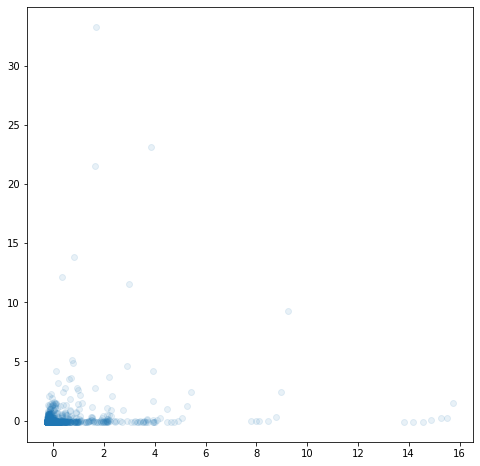

In [85]:
lab1 = 'Percent; PLACE OF BIRTH - Total population'
# lab2 = 'Acetyl fentanyl'
lab2 = 'Fentanyl'

plt.figure(figsize=(8, 8))
plt.scatter(df_percentage_standardized[lab1], df_percentage_standardized[lab2], alpha=.1)
plt.show()

It does seem more interesting patterns emerge between socio-economic data, rather than between socio-economic and drug data.

When it comes to drug-drug comparison, however, the standardized version of percentage matrix makes no difference.

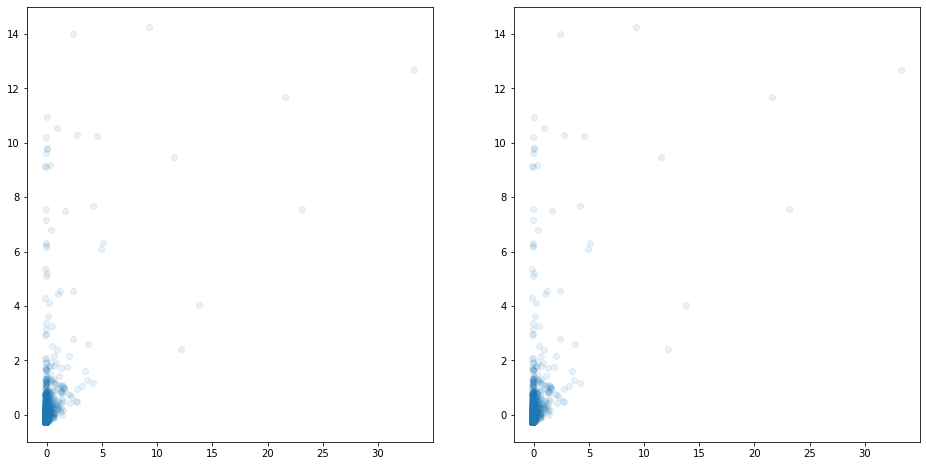

In [86]:
lab1a = 'Fentanyl'
lab1b = 'Fentanyl'
lab2 = 'Heroin'
compare_plots(lab1a, lab1b,
              lab2, lab2,
              df_standardized, df_percentage_standardized,
              '', '')

Thus, there is little point in analyzing things that are only related to drugs.

## Year-by-year PCA

We perform PCA for each year.

*Issues: previously heterogeneous entries become homogeneous.*

In [87]:
# get the indices from the main database whose years correspond to the argument year.
index_func = lambda yyyy: list(filter(lambda i: sample_nz2[i][0] == yyyy, range(sample_nz2.shape[0])))

index_2010 = index_func(2010)
index_2011 = index_func(2011)
index_2012 = index_func(2012)
index_2013 = index_func(2013)
index_2014 = index_func(2014)
index_2015 = index_func(2015)
index_2016 = index_func(2016)

index_all = [index_2010,
            index_2011,
            index_2012,
            index_2013,
            index_2014,
            index_2015,
            index_2016]

In [88]:
sample_percentage_standardized = np.array(df_percentage_standardized).T[1:].T # remove first column (years)
df_perc_all = {"201{}".format(i): pd.DataFrame(sample_percentage_standardized[index_all[i]],
                                                index=sample_point_id_join[index_all[i]],
                                                columns=nonzero_features[1:]) for i in range(7)}

In [89]:
svd_all = {key: np.linalg.svd(df_perc_all[key].T, full_matrices=False) for key in df_perc_all.keys()}
pc_all = {key: np.matmul(svd_all[key][0], np.diag(svd_all[key][1])) for key in df_perc_all.keys()}
pca1_all = {key: pc_all[key][0] for key in df_perc_all.keys()}

# Thoughts

* Consider more sophisticated methods to treat missing data: flaws of row and column elimination.
* Challenges with splitting data
* Outlier issues: identify and remove outliers, then perform PCA again.
    * Further directions: MacroPCA (deal with outliers and missing data)

* Optimization: improve performance of code so data can be resampled efficiently.
